In [1]:

# iMPORT Pandas
import pandas as pd 

# Impot Matplotli
import matplotlib.pyplot as plt
%matplotlib inline

# Import Seaborn
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"D:\MLProjects\ZDatasets\AirlineData\data\Data_Train.csv")
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Basic Data Quality Checks

In [3]:
# Print Selected Rows
df.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24-06-2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,18:55,13-03-2023 10:25,15h 30m,1 stop,In-flight meal not included,11087
7,NaN,01-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,NaN,02-03-2023 05:05,21h 5m,1 stop,No info,22270
8,NaN,12-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,NaN,13-03-2023 10:25,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27-05-2019,Delhi,Cochin,DEL ? BOM ? COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
# Check Missing Values 

df.isna().sum()


Airline            2
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           2
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
cond02 = df['Airline'].isna()==True



In [6]:
cond01 = df['Route'].isna()==True

df[cond01 | cond02]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7,NaN,01-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,NaN,02-03-2023 05:05,21h 5m,1 stop,No info,22270
8,NaN,12-03-2019,Banglore,New Delhi,BLR ? BOM ? DEL,NaN,13-03-2023 10:25,25h 30m,1 stop,In-flight meal not included,11087
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [7]:

airValue = df['Airline'].mode()[0]

df['Airline'].fillna(airValue,inplace=True)
df.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           2
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
RouteValue = df['Route'].mode()[0]

df['Route'].fillna(RouteValue,inplace=True)
df.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           2
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
deptValue = df['Dep_Time'].mode()[0]
df['Dep_Time'].fillna(deptValue,inplace=True)
df.isna().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
# replace missing Value of Total_Stops using Mode as Total_Stops is categorical COlumn
modeOfTotal_Stops = df['Total_Stops'].mode()[0]
df['Total_Stops'].fillna(modeOfTotal_Stops,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:

# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)


In [12]:
# Size of the Data
df.shape


(10682, 11)

In [13]:
# View of the Data
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [14]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [15]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
# how mathematically look like?
df.describe()


,Price
count,10682.000000
mean,9086.292735
std,4610.885695
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [20]:
df.duplicated().sum()


220

In [21]:
cond03 = df.duplicated()
df[cond03]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,01-06-2019,Delhi,Cochin,DEL ? NAG ? BOM ? COK,14:35,02-06-2023 04:25,13h 50m,2 stops,No info,13376
1061,Air India,21-05-2019,Delhi,Cochin,DEL ? GOI ? BOM ? COK,22:00,22-05-2023 19:15,21h 15m,2 stops,No info,10231
1348,Air India,18-05-2019,Delhi,Cochin,DEL ? HYD ? BOM ? COK,17:15,19-05-2023 19:15,26h,2 stops,No info,12392
1418,Jet Airways,06-06-2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,05:30,07-06-2023 04:25,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10593,Jet Airways,27-06-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,28-06-2023 12:35,13h 30m,2 stops,No info,12819
10615,Jet Airways,01-06-2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,02-06-2023 12:35,26h 55m,2 stops,No info,13014
10633,Jet Airways,06-06-2019,Delhi,Cochin,DEL ? JAI ? BOM ? COK,09:40,07-06-2023 12:35,26h 55m,2 stops,In-flight meal not included,11733
10671,Jet Airways,27-06-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,23:05,28-06-2023 19:00,19h 55m,2 stops,In-flight meal not included,11150


In [22]:
df.drop_duplicates(inplace=True)


In [23]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [26]:
'''corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")
'''


'corr = df.corr()\nsns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=\'Blues\' ,fmt=".3f")\n'

In [ ]:
df


In [ ]:
# Handle uneven Values

In [27]:
print(df['Airline'].value_counts())


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [28]:
#counts/Unique


# Multiple carriers Premium economy with the Multiple carriers
# Jet Airways Business with Jet Airways
# Vistara Premium economy Vistara 

df['Airline'].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)

df['Airline'].replace("Jet Airways Business","Jet Airways",inplace=True)

df['Airline'].replace("Vistara Premium economy","Vistara",inplace=True)

print("----------------------")

print(df['Airline'].value_counts())



----------------------
Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


In [29]:
df['Source'].value_counts()


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [30]:
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [31]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)

df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [32]:
df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [34]:
# Know the Value counts of the categorical Data.

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print("------------")


Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64
------------
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64
------------
Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64
------------
DEL ? BOM ? COK          2377
BLR ? DEL                1536
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64
------------
2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
        

# Graph based Analyis


In [35]:
# Count Plot , count of the specified feature
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


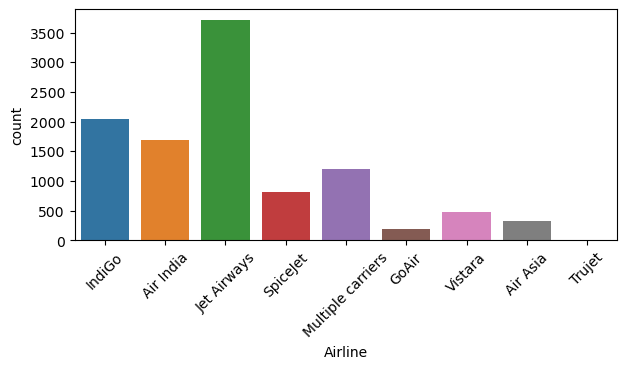

In [153]:
# Source
# Delhi has the maximum take offs chennai has the lest
plt.figure(figsize=(7,3))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


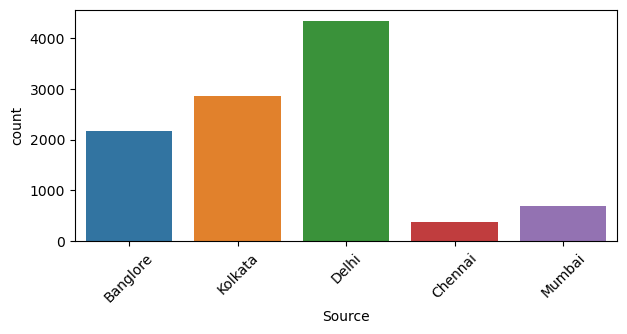

In [154]:
# Source
# Delhi has the maximum take offs chennai has the lest
plt.figure(figsize=(7,3))
sns.countplot(x=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


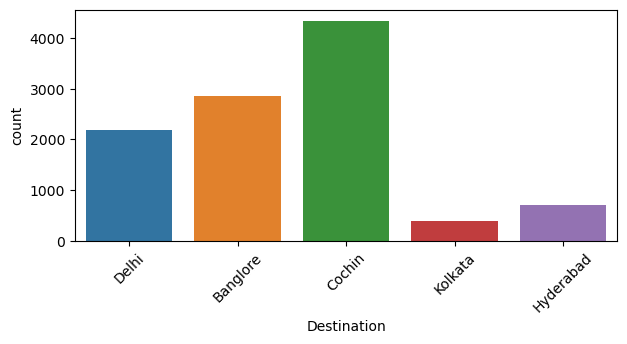

In [155]:
# Destination
# Coachin has the maximum Arrivals
plt.figure(figsize=(7,3))
sns.countplot(x=df['Destination'])
plt.xticks(rotation=45) 
plt.show() 


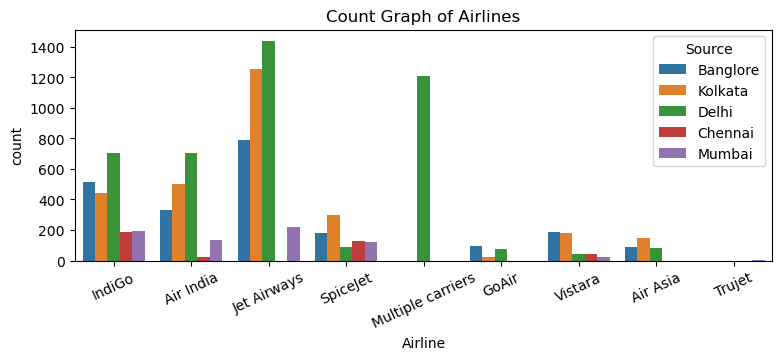

In [157]:
# multivariate Analysis

plt.figure(figsize=(9,3))
sns.countplot(x=df['Airline'],hue=df['Source'])
plt.xticks(rotation=25)
plt.title("Count Graph of Airlines")
plt.show()


# Delhi has the max Depatures
# Jet Airways with Delhi has the max Depatures



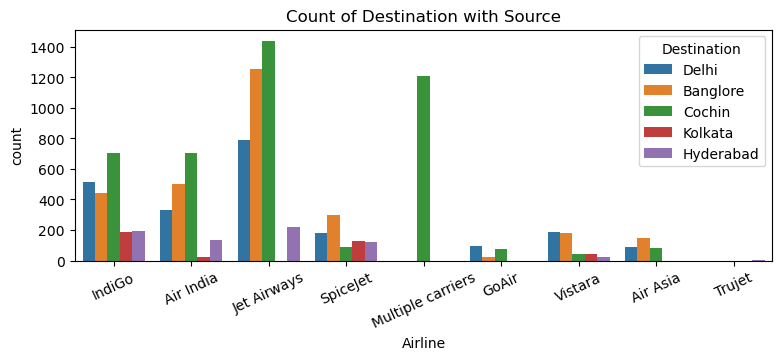

In [158]:
plt.figure(figsize=(9,3))
sns.countplot(x=df['Airline'],hue=df['Destination'])
plt.xticks(rotation=25)
plt.title("Count of Destination with Source")
plt.show()


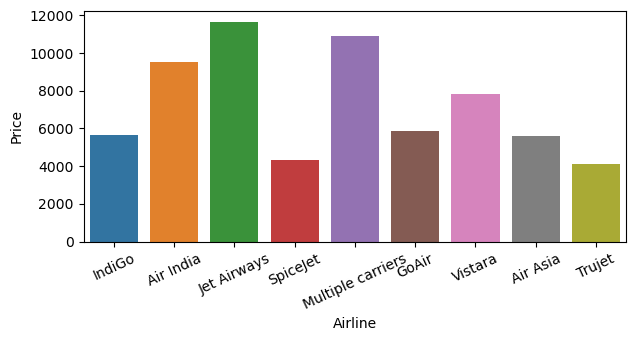

In [159]:
# Sales/Price Distribution
plt.figure(figsize=(7,3))
sns.barplot(x=df['Airline'],y=df['Price'],errorbar=None)
plt.xticks(rotation=25)

plt.show()


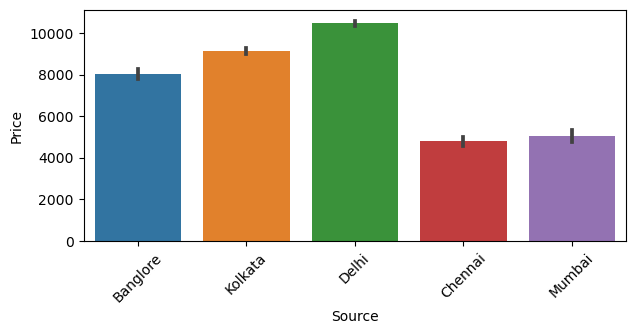

In [160]:

plt.figure(figsize=(7,3))
sns.barplot(x=df['Source'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


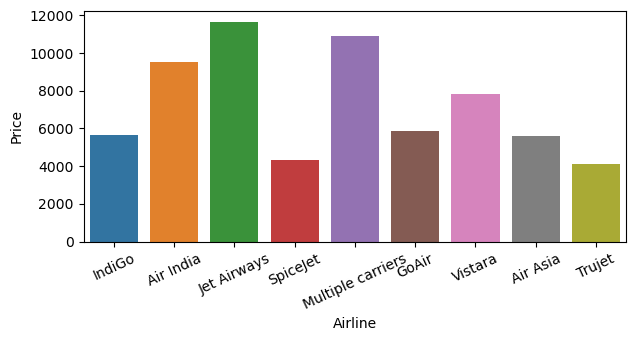

In [162]:
# Sales/Price Distribution using Multivariate Analysis
plt.figure(figsize=(7,3))
sns.barplot(x=df['Airline'],y=df['Price'],errorbar=None)
plt.xticks(rotation=25)
plt.show()


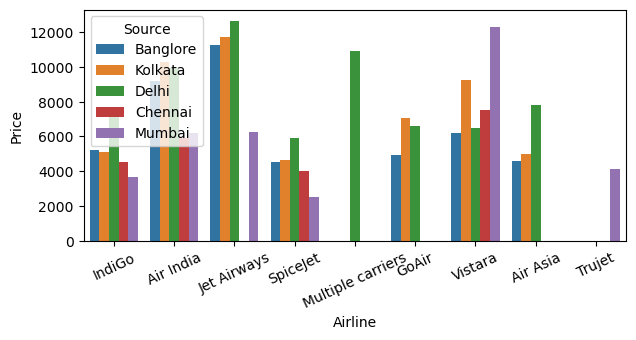

In [161]:
# Sales/Price Distribution using Multivariate Analysis
plt.figure(figsize=(7,3))
sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Source'],errorbar=None)
plt.xticks(rotation=25)
plt.show()


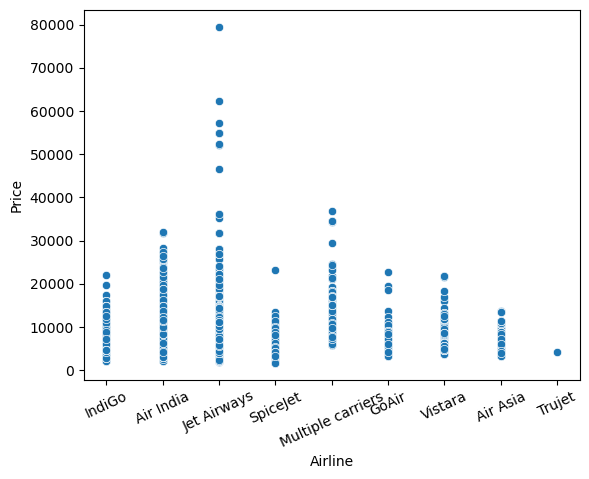

In [163]:
sns.scatterplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=25)
plt.show()


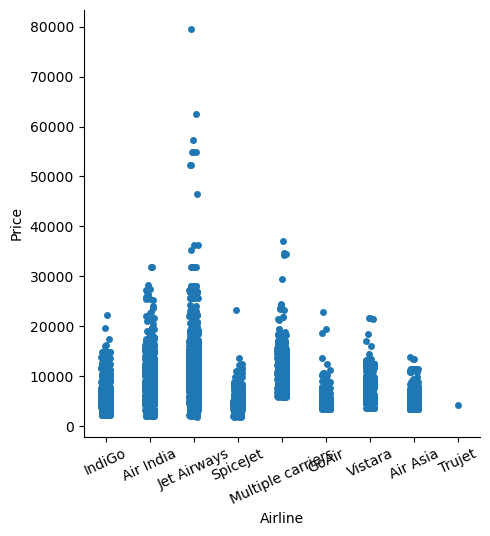

In [87]:

sns.catplot(x=df['Airline'], y=df['Price'])
plt.xticks(rotation=25)
plt.show() 


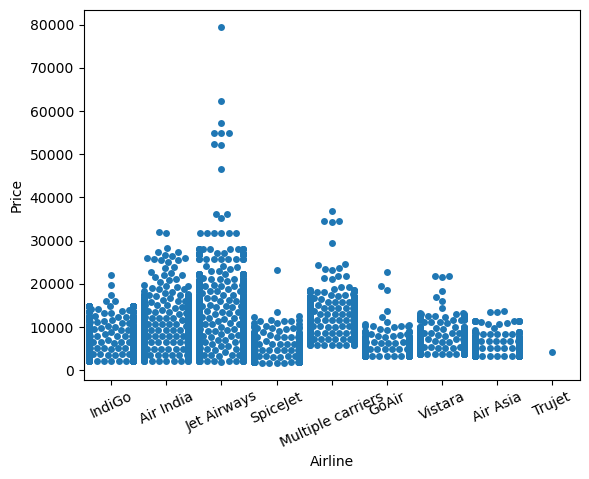

In [88]:

sns.swarmplot(x=df['Airline'], y=df['Price'])
plt.xticks(rotation=25)
plt.show() 


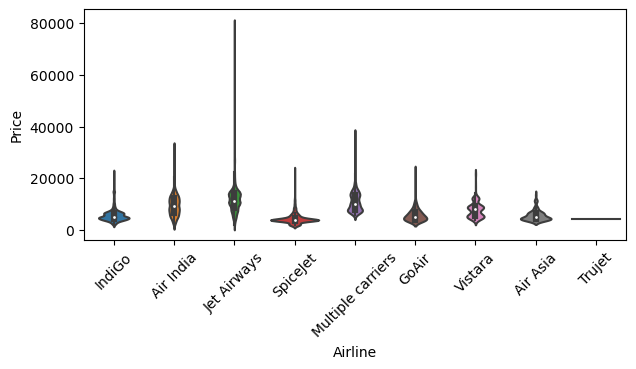

In [89]:

plt.figure(figsize=(7,3))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


In [ ]:
'''
plt.figure(figsize=(15,5))
sns.swarmplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 

'''

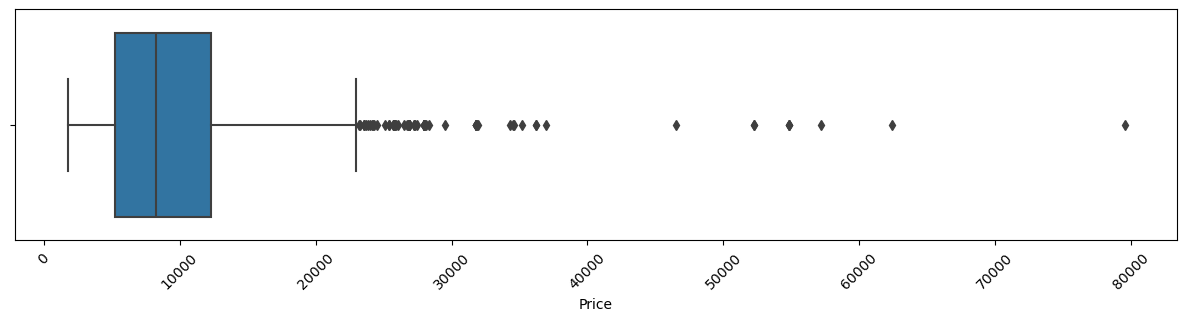

In [164]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



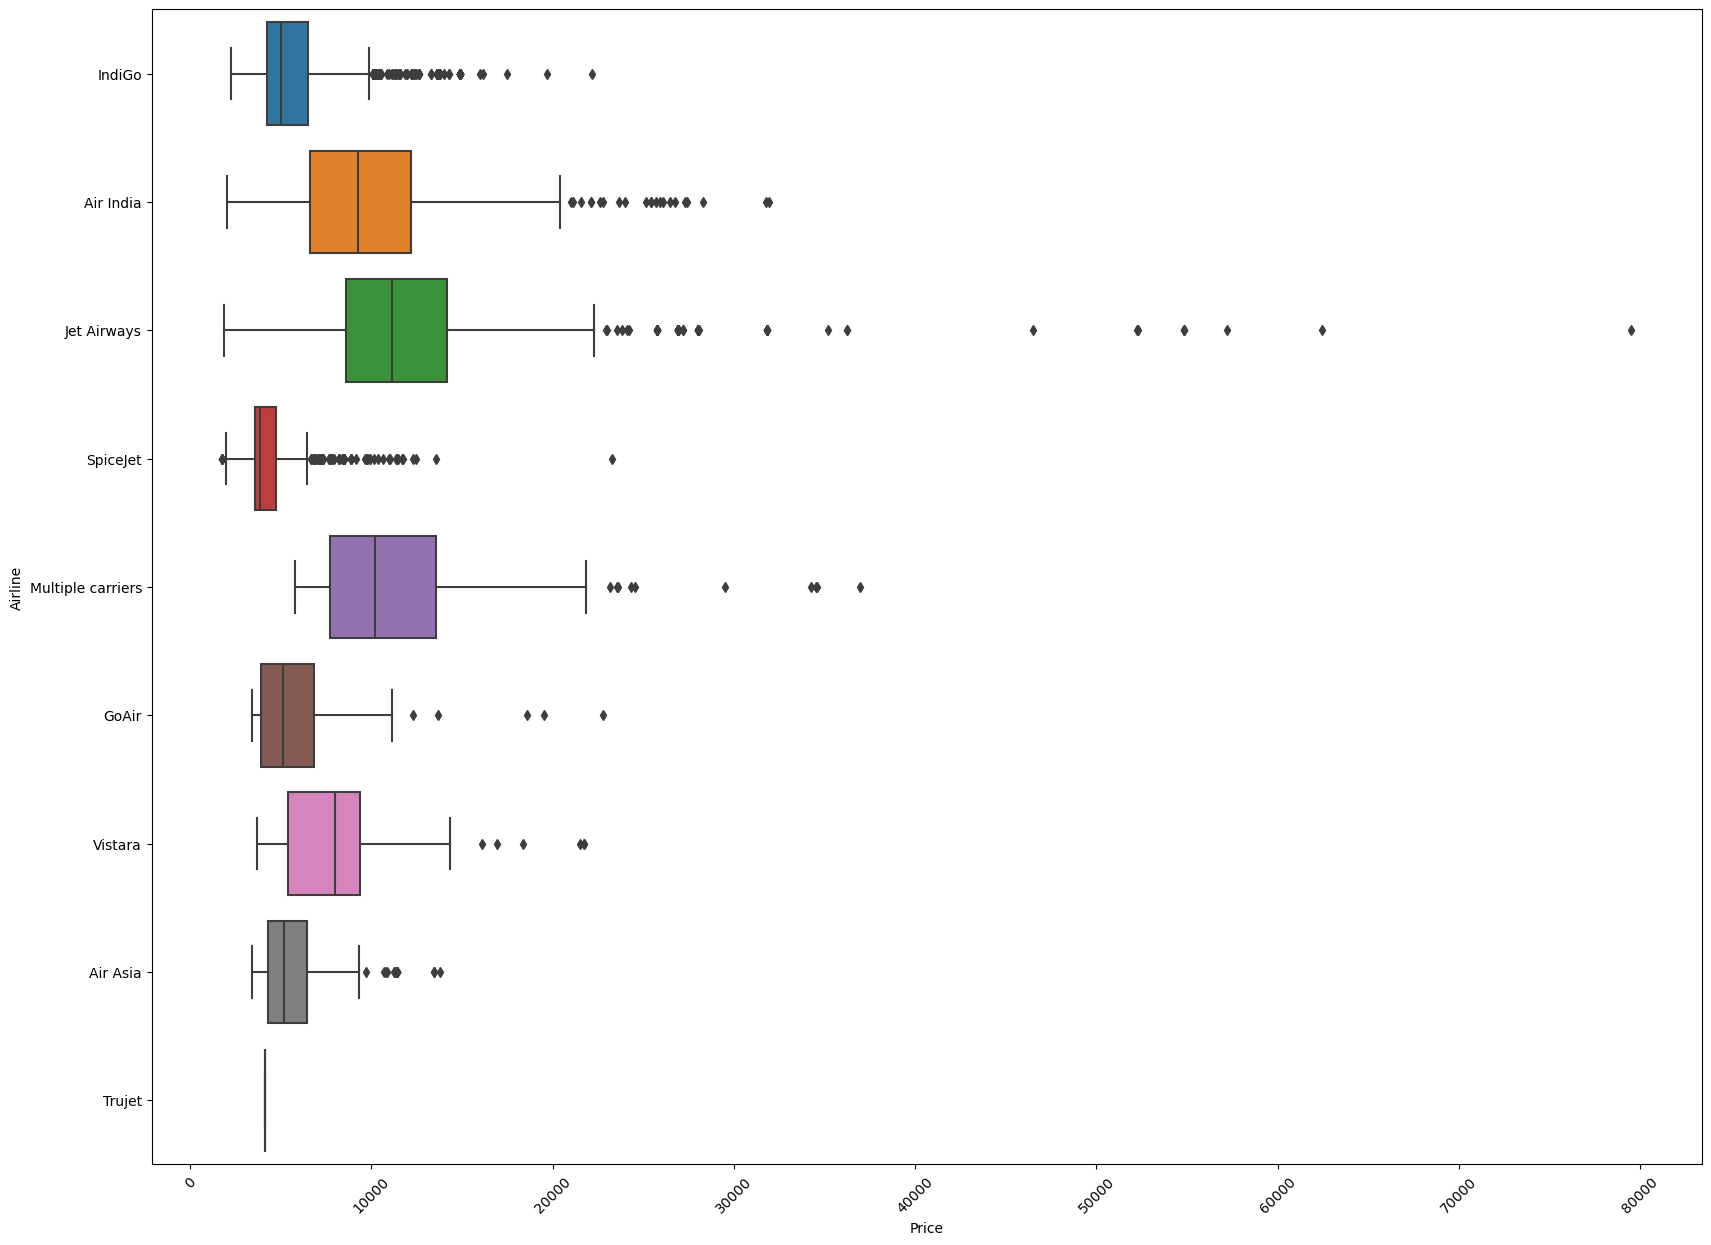

In [91]:
# Outlier Detection

plt.figure(figsize=(20,15))
sns.boxplot(y=df['Airline'],x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Axes: xlabel='Price', ylabel='Density'>

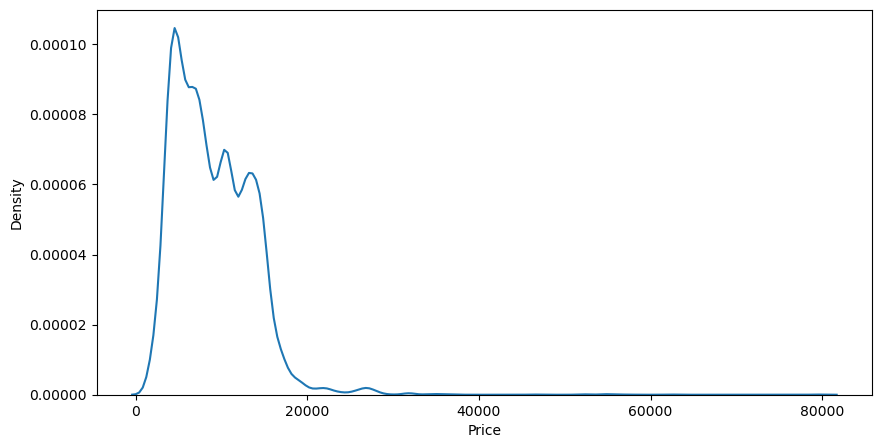

In [165]:

plt.figure(figsize=(10,5))
sns.kdeplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

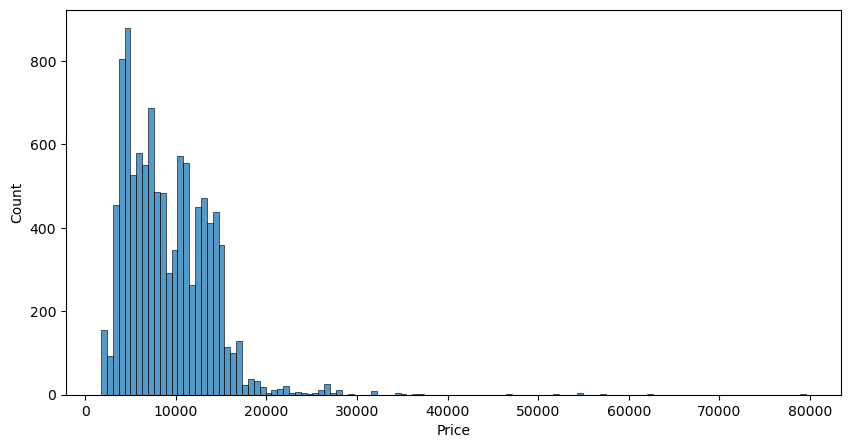

In [93]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

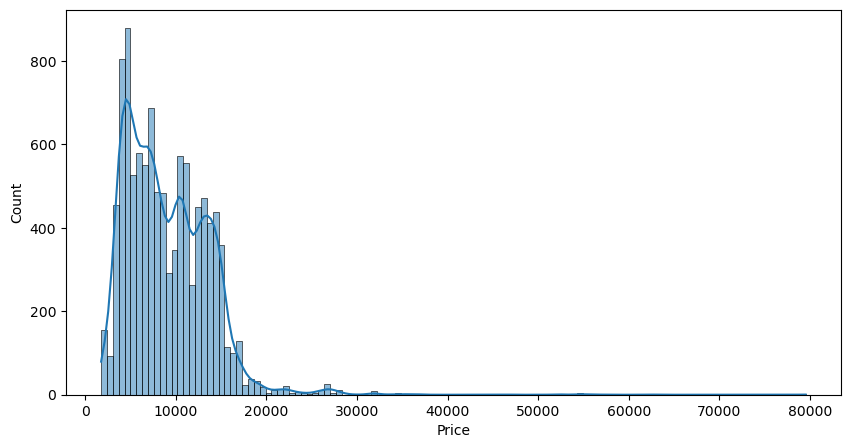

In [94]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'],kde=True)


In [ ]:
df[df['Airline']=='Air India']

In [95]:
for i in list(enumerate(df['Airline'].unique())):
    print(i[0]+1)
    

1
2
3
4
5
6
7
8
9


In [118]:
list(enumerate(df['Airline'].unique()))


[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]

In [99]:
listOfAirline = list(enumerate(df['Airline'].unique()))
listOfAirline


[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]

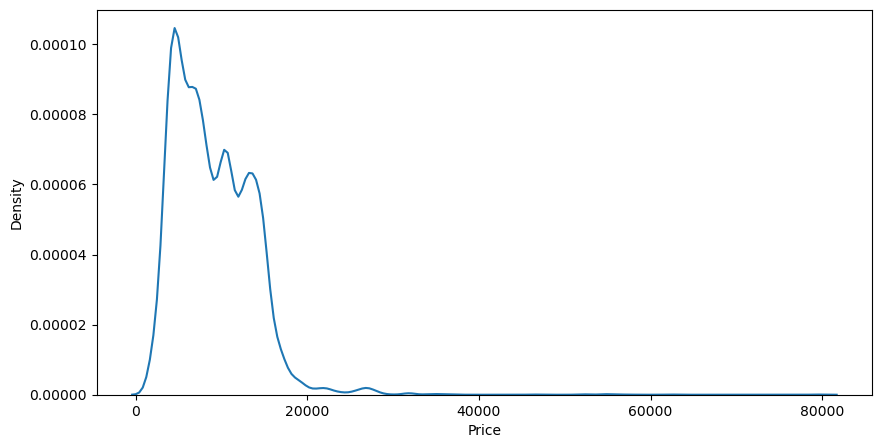

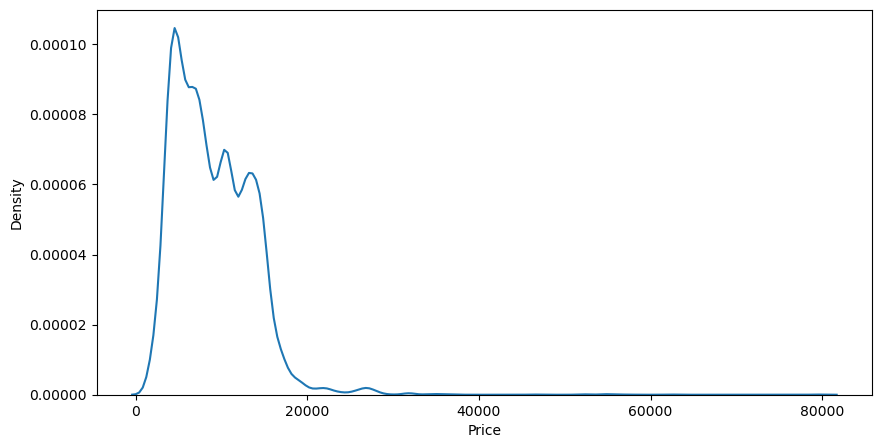

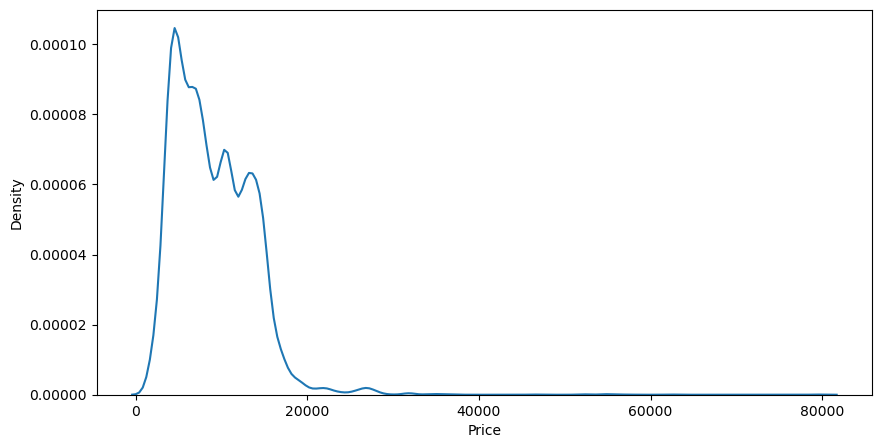

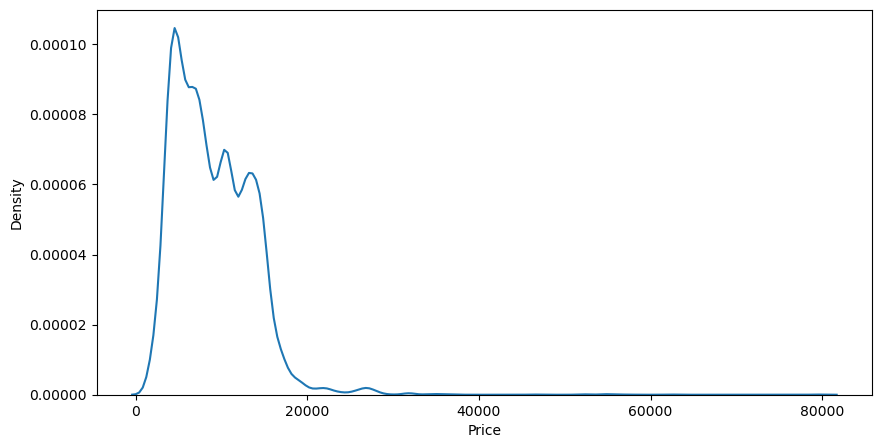

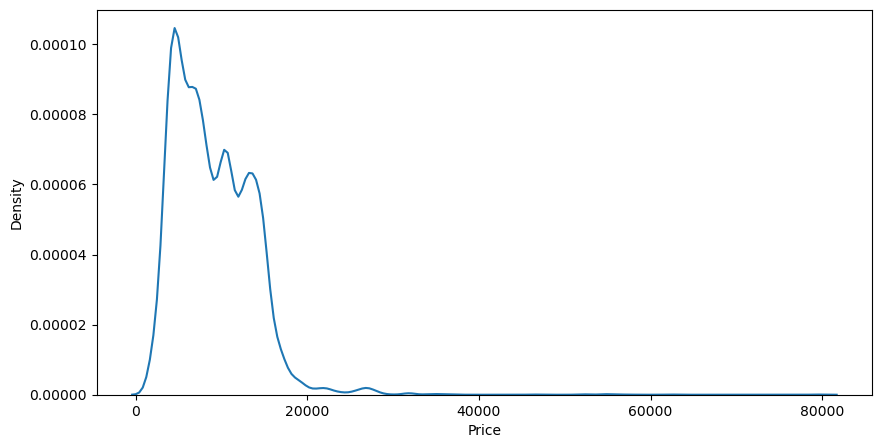

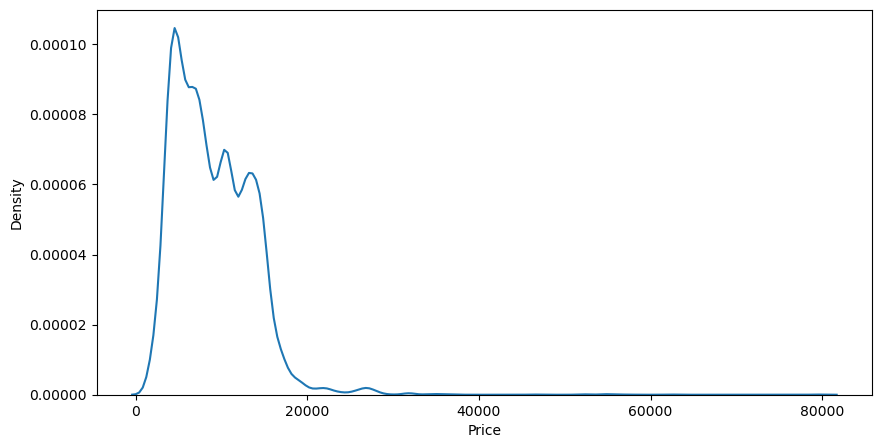

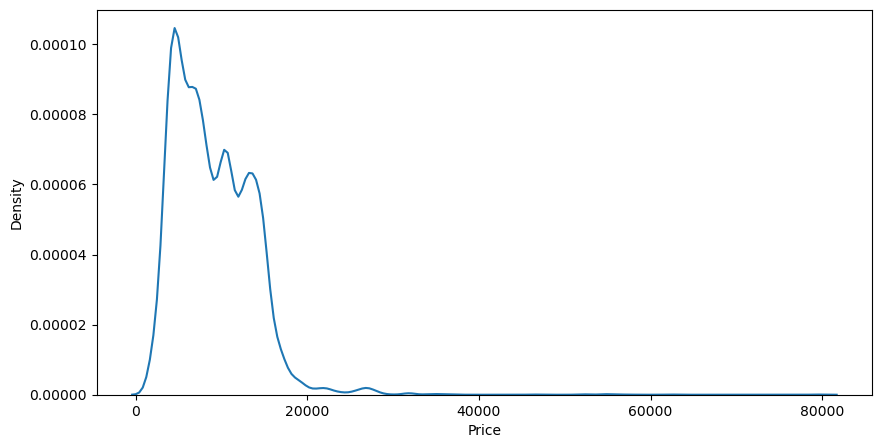

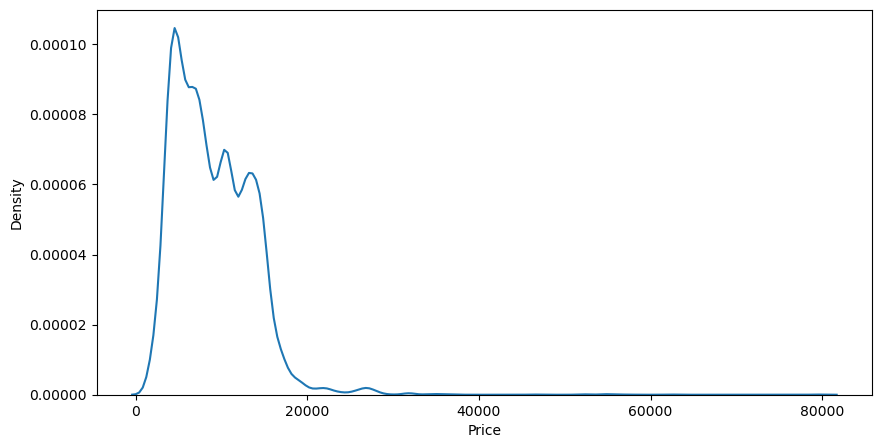

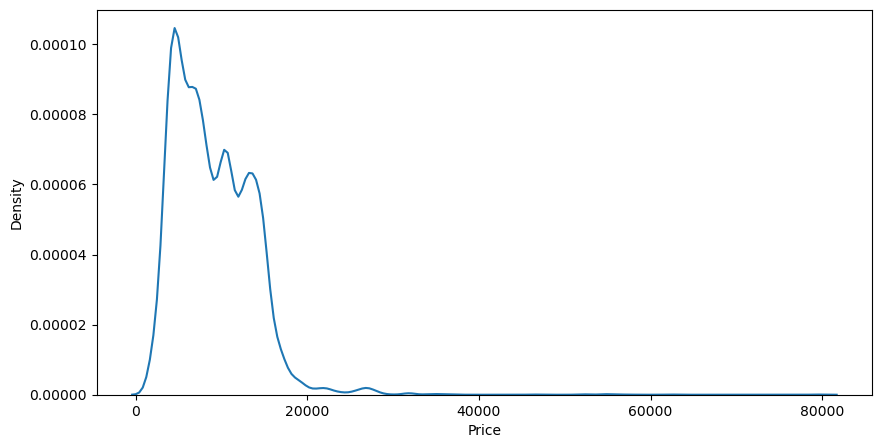

In [120]:
for i in listOfAirline:
    plt.figure(figsize=(10,5))
    sns.kdeplot(x=df['Price'])

    


In [123]:
df[df['Airline']=='Air India']


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
10,Air India,01-06-2019,Delhi,Cochin,DEL ? BLR ? COK,09:45,23:00,13h 15m,1 stop,No info,8907
12,Air India,24-06-2019,Chennai,Kolkata,MAA ? CCU,11:40,13:55,2h 15m,non-stop,No info,4667
15,Air India,03-03-2019,Delhi,Cochin,DEL ? AMD ? BOM ? COK,16:40,04-03-2023 19:15,26h 35m,2 stops,No info,14011
18,Air India,12-06-2019,Delhi,Cochin,DEL ? CCU ? BOM ? COK,20:15,13-06-2023 19:15,23h,2 stops,No info,13381
...,...,...,...,...,...,...,...,...,...,...,...
10669,Air India,12-05-2019,Kolkata,Banglore,CCU ? IXR ? DEL ? BLR,05:50,23:15,17h 25m,2 stops,No info,11411
10670,Air India,06-06-2019,Mumbai,Hyderabad,BOM ? HYD,21:05,22:25,1h 20m,non-stop,No info,3100
10674,Air India,09-06-2019,Mumbai,Hyderabad,BOM ? HYD,06:20,07:40,1h 20m,non-stop,No info,3100
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145


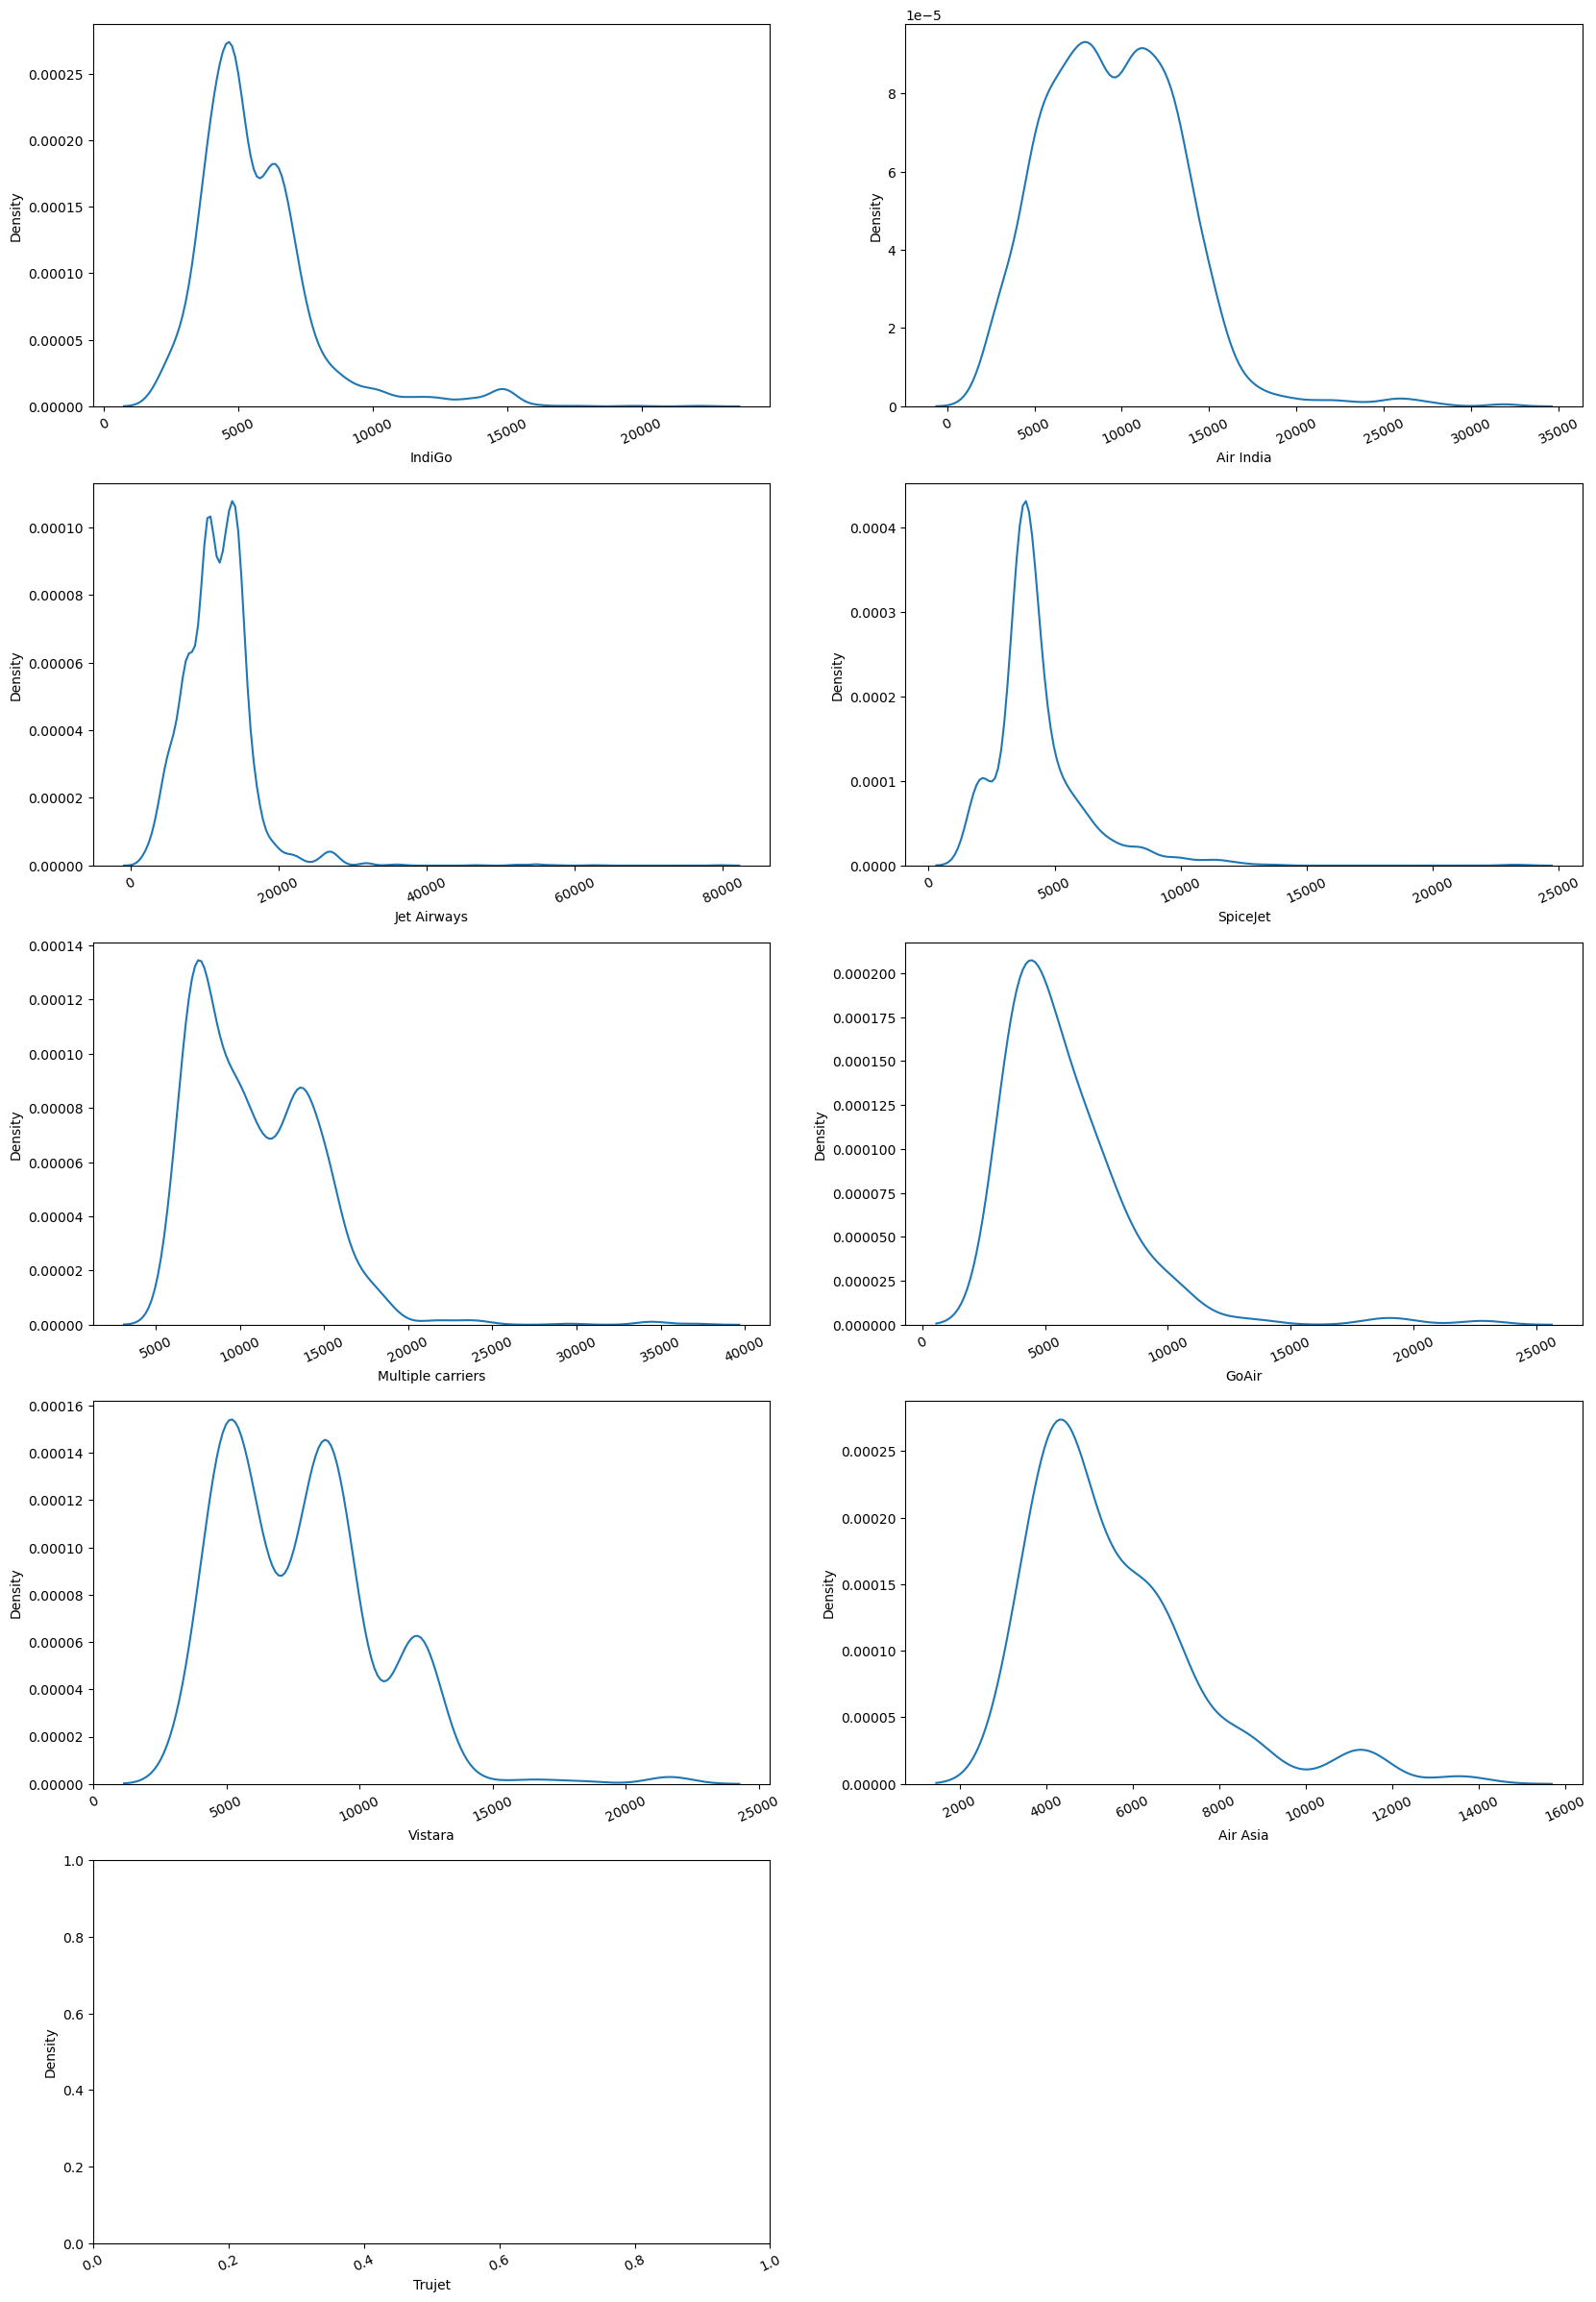

In [126]:
'''[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]'''



plt.figure(figsize=(20,30))

for i in listOfAirline:
    plt.subplot(5,2,i[0]+1)

    indi = df[df['Airline']==i[1]]
    
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1])
    plt.xticks(rotation=25) 

plt.show()


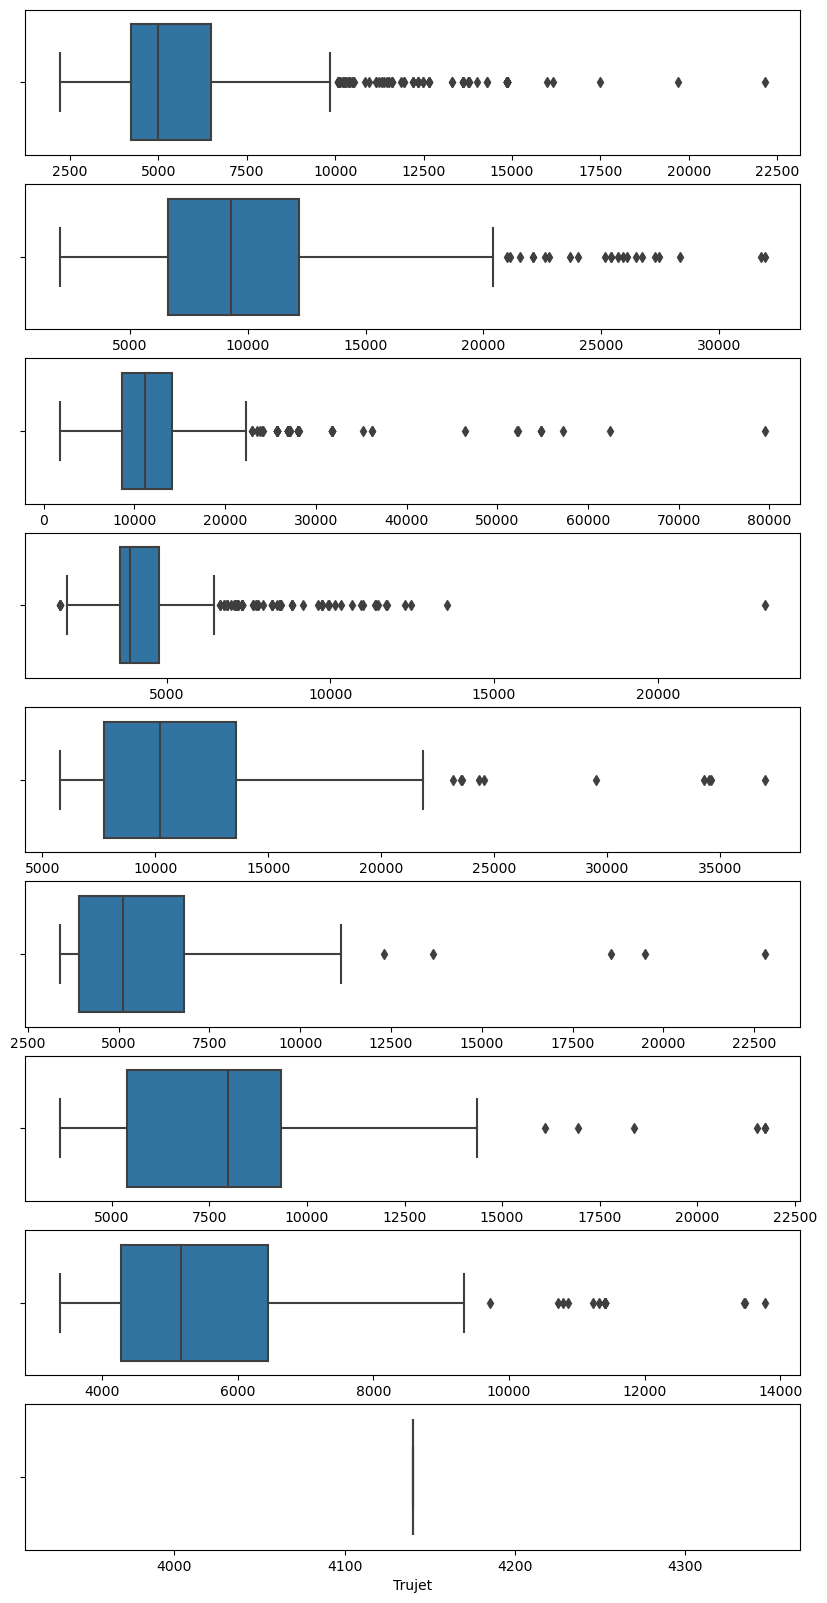

In [148]:
plt.figure(figsize=(10,20))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(9,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 

